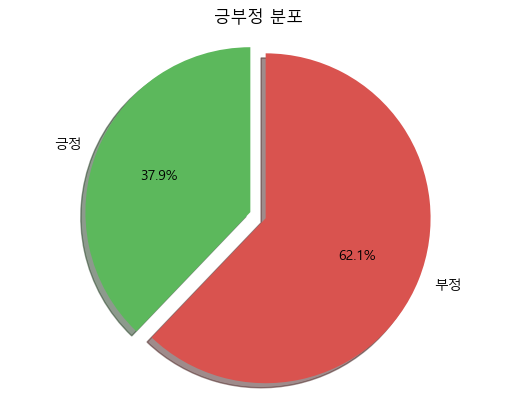

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 폰트 경로 지정
font_path = 'C://Windows//Fonts//malgun.ttf' 
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일 로드
csv_file = 'crawl_pfizer_extract_Sentiment.csv'
df = pd.read_csv(csv_file)

# '긍부정' 열 값 카운트
counts = df['긍부정'].value_counts()

# 파이 차트 생성
labels = ['긍정', '부정']
sizes = [counts[1], counts[-1]]
colors = ['#5cb85c', '#d9534f']
explode = (0.1, 0)  # 첫 번째 조각을 약간 강조

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # 원형으로 보이도록 설정

# 그래프 제목
plt.title("긍부정 분포")

# 그래프 표시
plt.show()


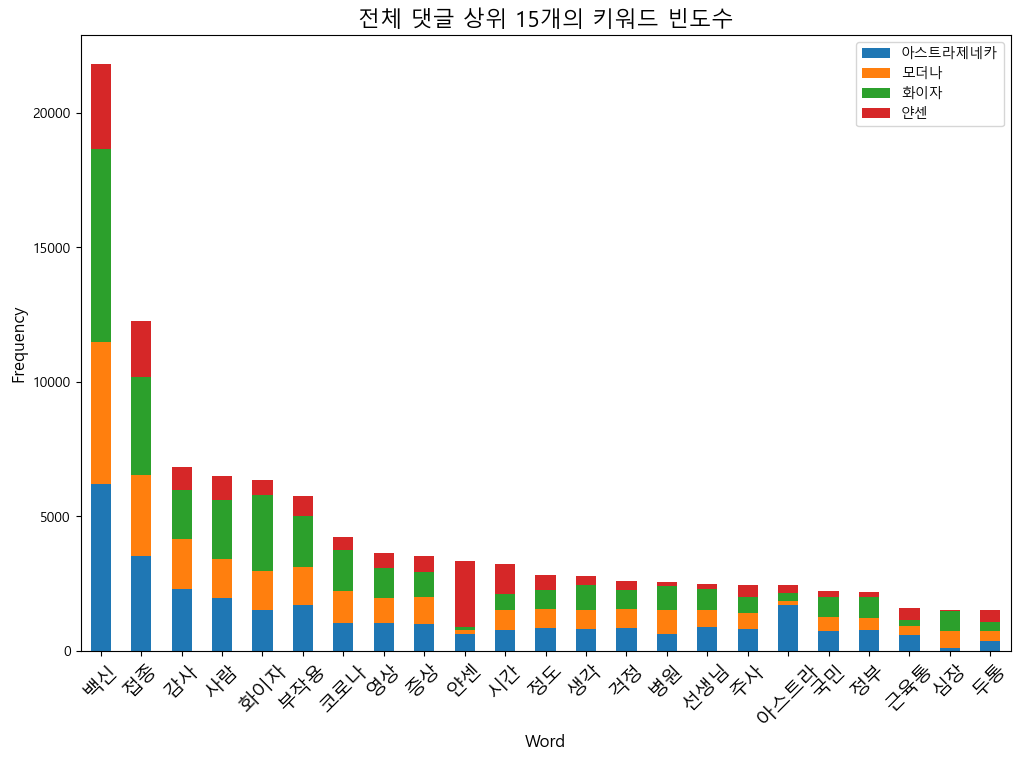

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# CSV 파일 읽기
df = pd.read_csv("vaccine_extract_Sentiment_noun_vaccine.csv", encoding='utf-8')

# NaN 값이 있는 행 제거
df = df.dropna(subset=['추출된 명사'])

# 각 백신 종류별로 분류하여 단어 빈도수 계산
word_counts_by_vaccine = {}
for vaccine in df['백신'].unique():
    words = df.loc[df['백신'] == vaccine, '추출된 명사']
    word_counts = words.str.split(expand=True).stack().value_counts()
    word_counts_by_vaccine[vaccine] = word_counts

# 한글자 단어와 특수문자가 포함된 단어 제외
word_counts_by_vaccine = {
    vaccine: word_counts[~word_counts.index.str.match(r'^[ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z]$')]
    for vaccine, word_counts in word_counts_by_vaccine.items()
}

# 상위 20개 단어 선택 및 빈도순으로 정렬
top_words = set()
for word_counts in word_counts_by_vaccine.values():
    top_words.update(word_counts.index[:15])
top_words = sorted(top_words, key=lambda word: sum([word_counts[word] for word_counts in word_counts_by_vaccine.values()]), reverse=True)

# 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 파일 경로
fontprop = fm.FontProperties(fname=font_path)

# 그래프 설정
plt.figure(figsize=(12, 8))

# 색상 설정
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# 각 백신 종류별로 비교 막대 그래프 그리기
bottom = pd.Series(0, index=top_words)
for i, (vaccine, word_counts) in enumerate(word_counts_by_vaccine.items()):
    word_counts = word_counts.loc[top_words]
    word_counts.plot(kind='bar', rot=45, alpha=1, label=vaccine, color=colors[i], bottom=bottom)
    bottom += word_counts
    
# 그래프 제목과 축 라벨 설정
plt.title("전체 댓글 상위 15개의 키워드 빈도수", fontproperties=fontprop, fontsize=16)
plt.xlabel("Word", fontproperties=fontprop, fontsize=12)
plt.ylabel("Frequency", fontproperties=fontprop, fontsize=12)

# 폰트 설정 적용
plt.xticks(fontproperties=fontprop, fontsize=14)
plt.yticks(fontproperties=fontprop)

# 범례 추가
plt.legend(prop=fontprop, fontsize=16)


# 그래프 출력
plt.show()


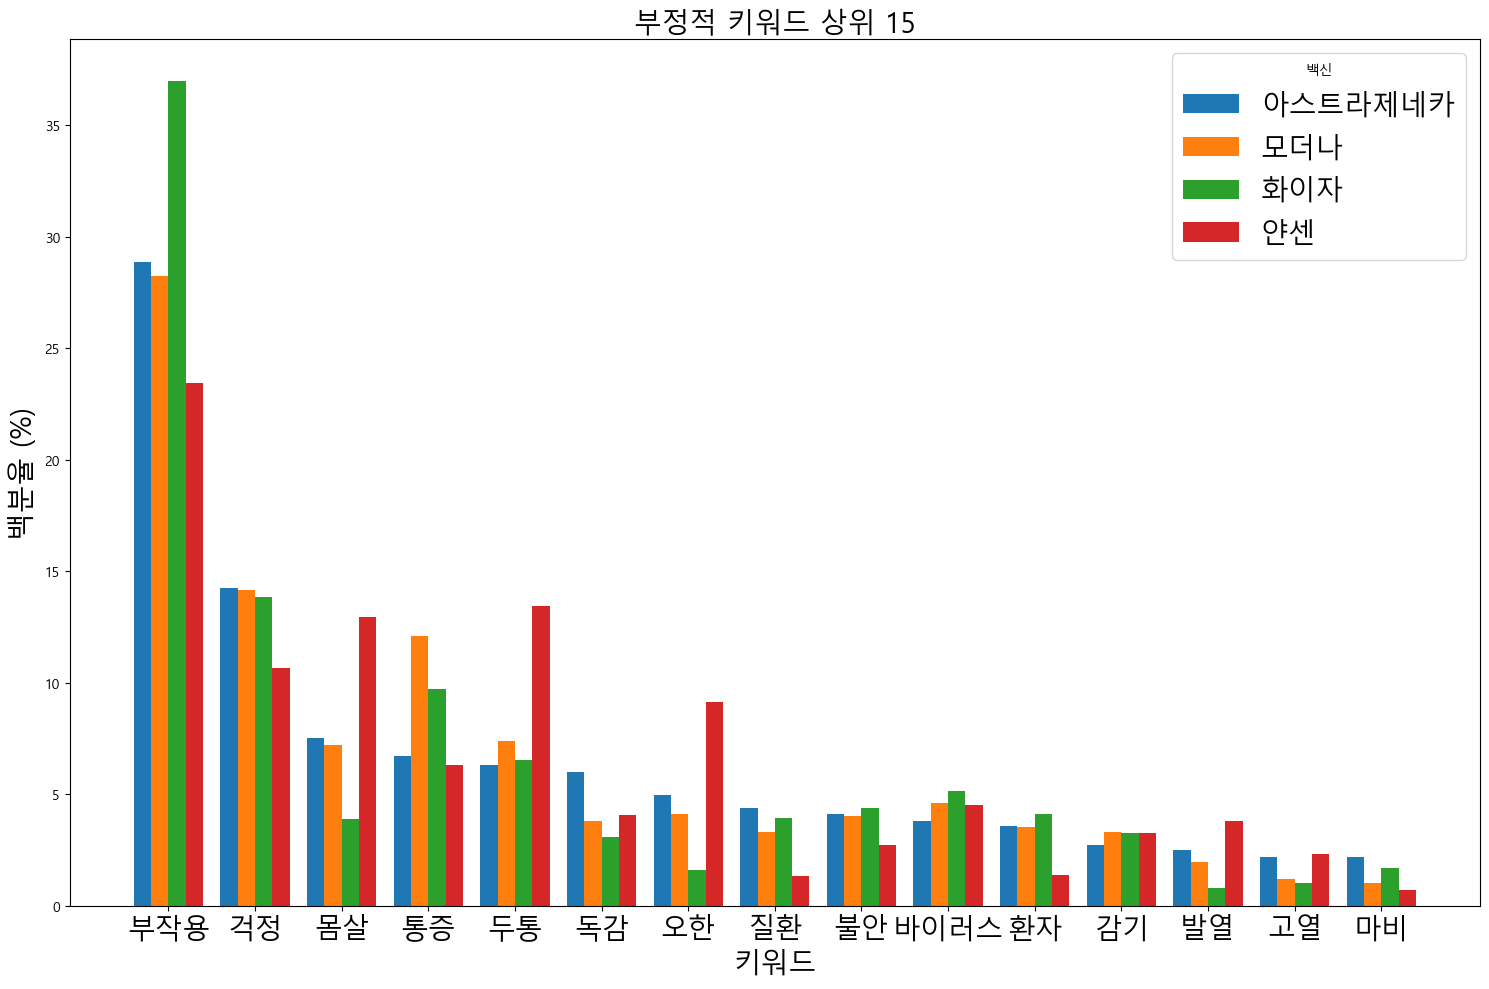

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일(.ttf)의 경로로 수정해야 합니다.
fontprop = fm.FontProperties(fname=font_path, size=20)  # 폰트 크기는 필요에 따라 조정 가능합니다.

# CSV 파일 로드
df = pd.read_csv('keyword_counts_Sentiment.csv')

# 백신 종류 추출
vaccines = ['아스트라제네카', '모더나', '화이자', '얀센']

# 상위 20개 키워드 추출
top_keywords = df[df['긍부정'] == -1].sort_values(by=vaccines, axis=0, ascending=False).head(15)['키워드']

# 데이터 프레임 변환을 위한 중간 과정
keyword_data = df.set_index('키워드').loc[top_keywords, vaccines]

# 백신 빈도수 합 계산
vaccine_sums = keyword_data.sum(axis=0)

# 각 키워드의 백신별 백분율 계산
keyword_percent = keyword_data.div(vaccine_sums, axis=1) * 100

# 그룹형 막대그래프 그리기
fig, ax = plt.subplots(figsize=(15, 10))  # 그래프의 크기를 조정합니다.
bar_width = 0.2  # 막대의 너비
index = np.arange(len(top_keywords))  # x축 좌표

for i, vaccine in enumerate(vaccines):
    values = keyword_percent[vaccine].values
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Specify the desired colors

alpha_value = 1  # Specify the desired alpha value (transparency)

for i, vaccine in enumerate(vaccines):
    values = keyword_percent[vaccine].values
    ax.bar(index + (i - 1.5) * bar_width, values, width=bar_width, label=vaccine, color=colors[i], alpha=alpha_value)



ax.set_xticks(index)
ax.set_xticklabels(top_keywords, rotation=0, fontproperties=fontprop)  # 폰트 설정 적용
ax.set_xlabel('키워드', fontproperties=fontprop)  # 폰트 설정 적용
ax.set_ylabel('백분율 (%)', fontproperties=fontprop)  # 폰트 설정 적용
ax.set_title('부정적 키워드 상위 15', fontproperties=fontprop)  # 폰트 설정 적용
ax.legend(title='백신', prop=fontprop)  # 폰트 설정 적용
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
plt.tight_layout()  # 그래프 요소들이 겹치지 않도록 자동으로 조정합니다.
plt.show()

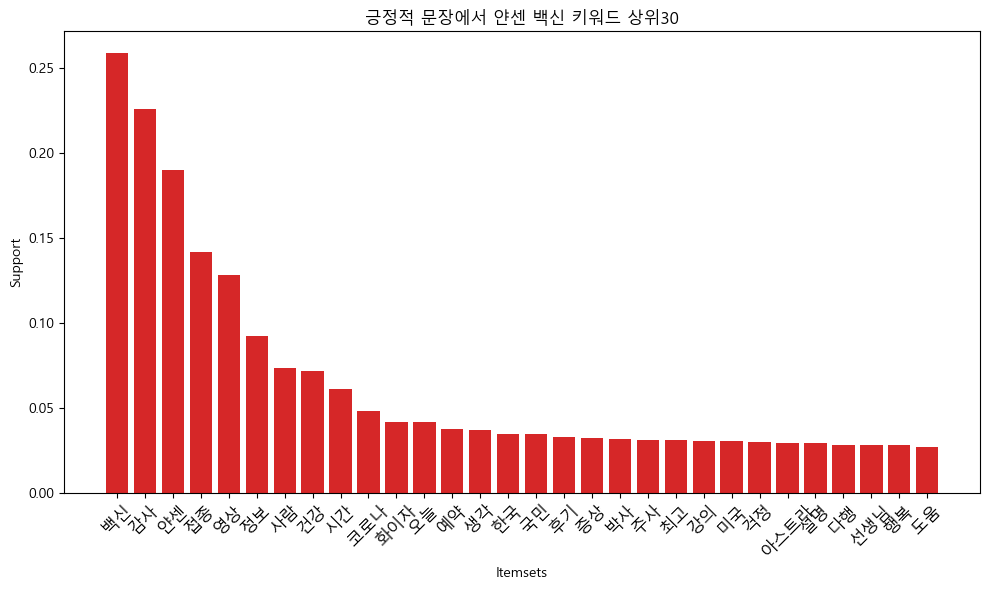

<Figure size 640x480 with 0 Axes>

C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(
C:\Users\tjoeun\AppData\Local\Temp\ipykernel_4032\2872475638.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  node_color_map = cm.get_cmap('tab20c')  # Choose a color map


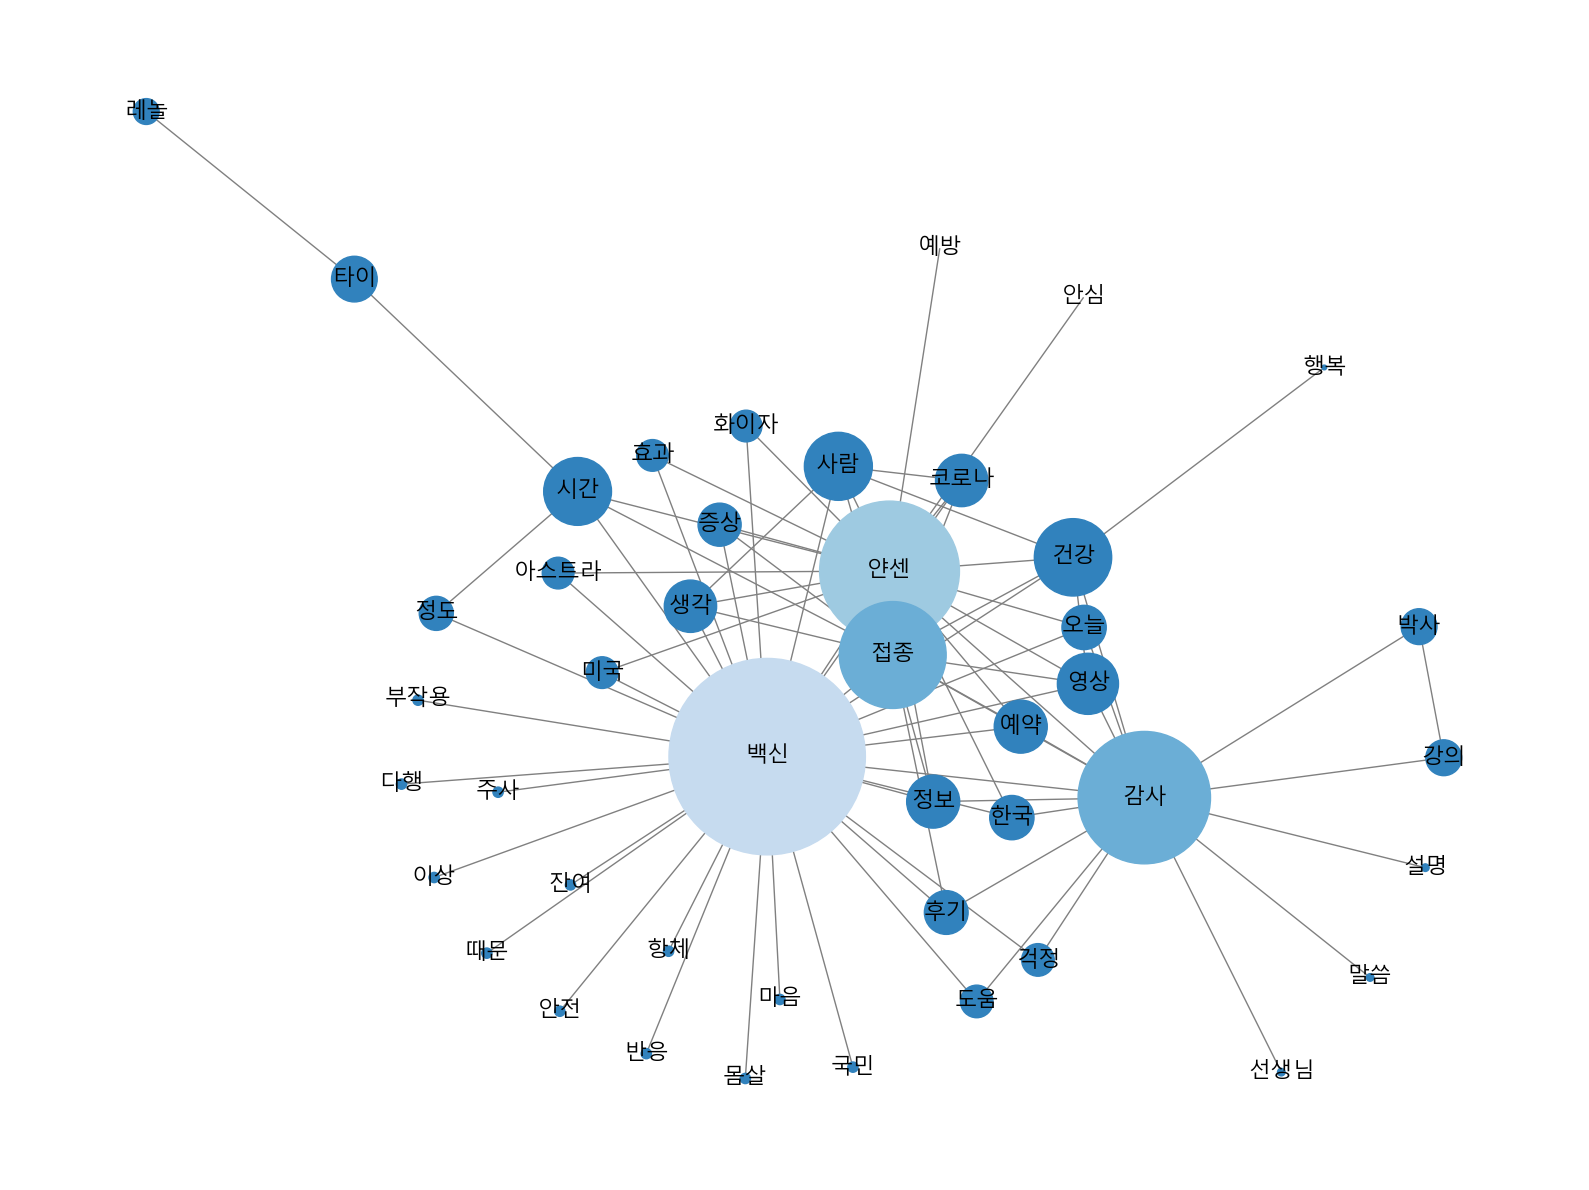

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.font_manager as fm

# Load and preprocess the data
with open("C://workspaces//ai//src//PROJECT1//crawl_Janssen_extract_Sentiment_pos_data_noun.csv", encoding='UTF8') as titles:
    lines = titles.readlines()

preprocessed_lines = []
for line in lines:
    line = line.strip()
    words = line.split()
    filtered_words = [word if word != '레노' else '레놀' for word in words if len(word) > 1]  # Replace words
    filtered_words = [word for word in filtered_words if word != '니다']  # Exclude '니다'
    filtered_words = [word for word in filtered_words if word != '가요']
    preprocessed_lines.append(filtered_words)

# Apply Apriori algorithm
te = TransactionEncoder()
te_ary = te.fit_transform(preprocessed_lines)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Filter frequent itemsets by length and support
df1 = frequent_itemsets[
    frequent_itemsets['itemsets'].apply(lambda x: len(x) == 1) & (frequent_itemsets['support'] >= 0.025)
].sort_values(by='support', ascending=False)

df2 = frequent_itemsets[
    frequent_itemsets['itemsets'].apply(lambda x: len(x) == 2) & (frequent_itemsets['support'] >= 0.01)
].sort_values(by='support', ascending=False)

# Plot term frequency for the top 50 items
fig, ax = plt.subplots(figsize=(10, 6))
bar_colors = ['#d62728']  # Add more colors if needed
top_items = df1.head(30)  # Select the top 50 items
ax.bar(top_items['itemsets'].apply(lambda x: ', '.join(x)), top_items['support'], color=bar_colors[:30])
ax.set_xticks(range(len(top_items)))
ax.set_xticklabels(top_items['itemsets'].apply(lambda x: ', '.join(x)), rotation=45, fontsize=12)  # Adjust the fontsize value
ax.set_xlabel('Itemsets')
ax.set_ylabel('Support')
ax.set_title('긍정적 문장에서 얀센 백신 키워드 상위30')

plt.tight_layout()
plt.show()


# Set font for Korean characters
font_path = "C:/Windows/Fonts/malgun.ttf"  # Update the font path if necessary
fontprop = fm.FontProperties(fname=font_path)
for label in ax.get_xticklabels():
    label.set_fontproperties(fontprop)
    
plt.tight_layout()
plt.show()

# Create and visualize the graph
G = nx.Graph()
for itemset in df2['itemsets']:
    items = list(itemset)
    G.add_edge(items[0], items[1])

pos = nx.kamada_kawai_layout(G)  # Generate node positions

pr = nx.pagerank(G)  # Calculate PageRank scores
nsize = [20000 * (pr[node] - min(pr.values())) / (max(pr.values()) - min(pr.values())) for node in G.nodes]

plt.figure(figsize=(16, 12))
plt.axis('off')
node_colors = list(pr.values())
node_color_map = cm.get_cmap('tab20c')  # Choose a color map
node_color_list = [node_color_map(x) for x in node_colors]

nx.draw_networkx(
    G,
    font_family='Malgun Gothic',  # Specify a font that supports Korean characters
    font_size=16,
    pos=pos,
    node_color=node_color_list,
    node_size=nsize,
    alpha=1,  # Adjust the alpha value for transparency
    edge_color='gray'
)

plt.tight_layout()
plt.show()
